# Jupyter Notebook for PHYS-1250 Spring 2018 Lab 07 - AC Circuits

This Jupyter Notebook is to be completed as your report for Lab 07. Use text cells to answer questions and code sections to input, fit, and plot data.

In [141]:
#  Import necessary libraries for numerical computing.
import numpy as np
%matplotlib notebook  
import matplotlib
import matplotlib.pyplot as plt
pi=3.14159

### Module 31A

Edit the text cell below to display the relationship between the amplitude of the ac voltage applied to the RC circuit on Lab Manual page 104 and the amplitude of the current.  

*  $I={V/X}$ where $X=1/\omega*C$ (fill in a function of R,C, $\omega$ using symbols, not numbers)

From question 3b on page 104- Edit the text below to display the angular frequency $\omega_{1/2}$ at which the current is 1/2 of $V/R$.

* $\omega_{1/2}=1/RC$ (fill in a function of R and C in Markdown)

From question 3a on page 104 - INPUT THE MEASURED VALUES OF YOUR RESISTOR AND CAPACITOR IN THE CODE BOX BELOW.

In [142]:
R=942   #input actual measured resistance here.
C=102E-9   #input measured capacitance here.
RC=R*C
print ("***The RC time constant is ",RC," seconds.***")

('***The RC time constant is ', 9.6084e-05, ' seconds.***')


Write some simple code below to calculate the frequency $f_{1/2}$ in Hz at which the current amplitude is 1/2 of its maximum value.

In [143]:
# Enter code as described above.
f_half=1/(2*3.1416*R*C) #  ??
print ("***f(1/2)=",f_half,"Hz")

('***f(1/2)=', 1656.4107543324258, 'Hz')


Prepare your data in an Excel Spreadsheet that you will store as a .csv file. Column "0" is the frequency in Hz,  column "1" is the signal amplitude from the function generator, column "2" is the signal amplitude from the resistor, column "3" is the time difference between the function generator and the resistor voltage peaks.

In [144]:
#I've written some code to read data from a .csv table.  You can still write out the data as two 1D arrays if you like. 
# Example follows.
#The following line reads data from a PHYS1250Data07.csv data file that is stored at the path location shown.
data07=np.genfromtxt("Book1.csv",delimiter=",")
print (data07)
frequency=data07[:,0]  # Read frequency column
Vfg=data07[:,1]        # Read the peak to peak voltage of the function generator.
Vfg_avg=np.average(Vfg)
Vr=data07[:,2]         # Read the pk to pk voltage of the resistor.
Dt=data07[:,3]         # Read the time delay between current and voltage. (Current LEADS voltage ICE)
RCGain=Vr/Vfg
PhaseDiff=Dt*frequency*2*pi

[[2.50e+02 9.50e+00 1.56e+00 9.20e+02]
 [5.00e+02 9.50e+00 2.88e+00 4.20e+02]
 [7.50e+02 9.50e+00 4.00e+00 2.50e+02]
 [1.50e+03 9.50e+00 6.24e+00 9.00e+01]
 [2.25e+03 9.50e+00 7.72e+00 5.60e+01]
 [3.00e+03 9.50e+00 8.32e+00 2.80e+01]
 [3.75e+03 9.50e+00 8.72e+00 1.80e+01]
 [4.50e+03 9.50e+00 8.80e+00 1.00e+01]
 [6.00e+03 9.50e+00 9.12e+00 7.00e+00]
 [8.00e+03 9.50e+00 9.28e+00 3.60e+00]
 [1.00e+04 9.50e+00 9.28e+00 2.80e+00]]


In [145]:
# This section is a theoretical model based on your input parameters for a comparison plot.
f_theory=np.arange(50,10000,50)
RCGain_theory=R/(np.sqrt(R**2+(1/(2*pi*C*f_theory)**2)))

<IPython.core.display.Javascript object>


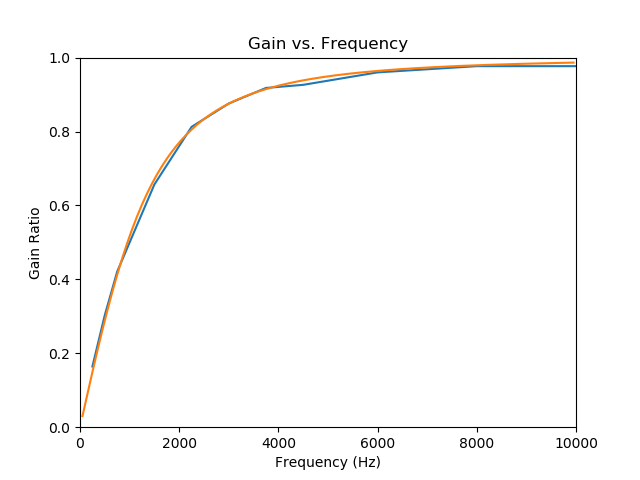

In [146]:
# This section plots measured and theoretical gain as a function of frequency
plt.figure()
plt.plot(frequency,RCGain)
plt.plot(f_theory,RCGain_theory)
plt.axis([0,10000,0,1])   # Adjust axis parameters as desired.
plt.title("Gain vs. Frequency")   # Add appropriate title and axis labels.
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain Ratio")
plt.show()

* * In this cell discuss your theoretical curve and compare it with the measured data. If there are systematic differences, try to explain their origins.

The theory and data match within a low range of expirimental error.


You can experimentally calculate the phase difference between current and voltage in two ways. 

1) $\phi_{voltage}=cos^{-1}(V_R/V_{fg})$

2) $\phi_{time}=t_{delay} * Frequency * 2 * \pi$

The phase difference can also be calculated and plotted theoretically.  
3) $\Delta \phi = tan^{-1}(1/(R \omega C)$


<IPython.core.display.Javascript object>


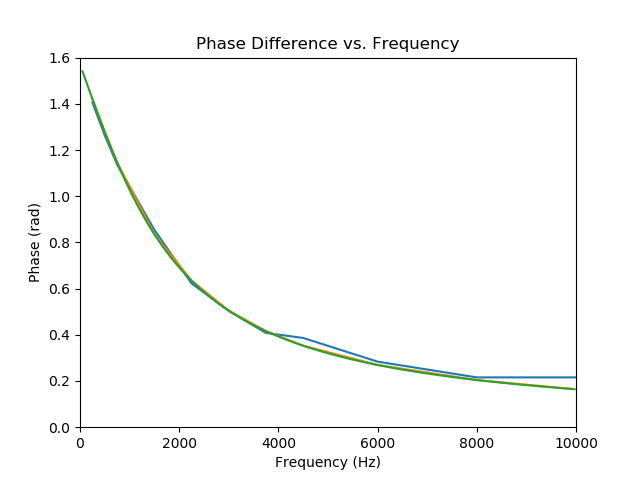

In [147]:
#Code cell for calculating and plotting phase difference.
PhaseDiffVoltage=  np.arccos(RCGain)  #Input your formula
PhaseDiffTime= np.arctan(1/(R*C*frequency*2*pi))
PhaseDiffTheory=np.arctan(1/(R*f_theory*2*pi*C))     
plt.figure()
plt.plot(frequency,PhaseDiffVoltage)  #Turn on these plots.
plt.plot(frequency,PhaseDiffTime)     #Turn on these plots.
plt.plot(f_theory,PhaseDiffTheory)
plt.axis([0,10000,0,1.6])   # Adjust axis parameters as desired.
plt.title("Phase Difference vs. Frequency")   # Add appropriate title and axis labels.
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")
plt.show()

1) Compare the phase as measured by the two technicques. Which one do you think has less uncertainty? Why?
The voltage phase has less uncertainty as that is calculated by an ocilliscope, while the time phase is gleaned through human measurment
2) Discuss whether the behavior of the phase with frequency is as you expect from theory.
Yes, a low frequency corresponds to a high phase difference as the capacitor does not have enough time to 'react' to each changing frequency.

# LRC Circuit

In [148]:
# Ive written some code to read data from a .csv table.  You can still write out the data as two 1D arrays if you like.
#position=np.array([1,2,3,4,5])
#field=np.array([8,9,8,9,8])
#The following line reads data from a PHYS1250Data07.csv data file that is stored at the path location shown.
data07rlc=np.genfromtxt("data.csv",delimiter=",")
frequencyrlc=data07rlc[:,0]  # Read frequency column
Vfgrlc=data07rlc[:,1]        # Read the peak to peak voltage of the function generator.
Vrlc=data07rlc[:,2]         # Read the pk to pk voltage of the resistor.
Dtrlc=data07rlc[:,3]*10**-6         # Read the time delay between current and voltage. (Current LEADS voltage ICE)
RLCPhaseDiff=Dtrlc*frequencyrlc*2*pi

Edit this cell to create a Markdown equation for the amplitude and phase of the current through an RLC circuit in terms of $V_{applied}$, R, L, C, and $\omega$.

$$I=V_{applied}/\sqrt(R^2+(\omega*L-1/(\omega*c))^2)$$

$$\theta=\arctan((\omega*L-1/(C*\omega))/R)$$

In [149]:
# This section is a theoretical model based on your input parameters for a comparison plot.
R=100     # INPUT resistance in your RLC circuit
L=0.034   # INPUT inductance in your RLC circuit
C=100E-9   #INPUT capacitance in your RLC circuit
f_theory=np.arange(50,10000,50)
omega=2*pi*f_theory
XC=1/(omega*C)
XL=omega*L
Vrlc_theory=Vfg_avg*R/(np.sqrt(R**2+(XL-XC)**2))
RLCPhaseDiffTheory=np.arctan((XL-XC)/R)

<IPython.core.display.Javascript object>


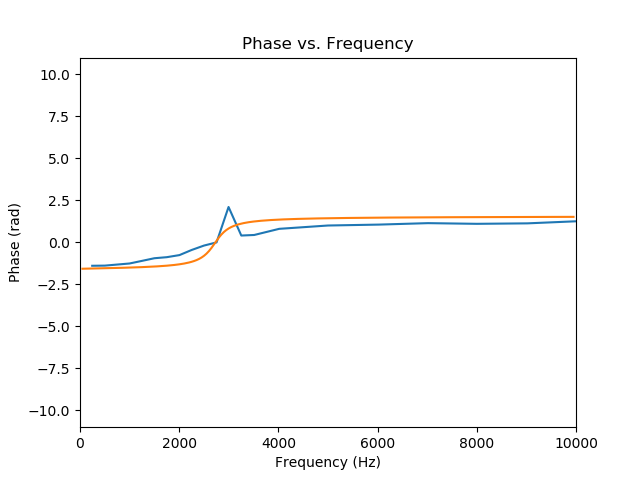

In [150]:
#Edit this cell to plot your theoretical function and your measured data for current amplitude as a function of frequency.
plt.figure()
plt.plot(frequencyrlc,RLCPhaseDiff)
plt.plot(f_theory,RLCPhaseDiffTheory)
plt.axis([0,10000,-11,11])   # Adjust axis parameters as desired.
plt.title("Phase vs. Frequency")   # Add appropriate title and axis labels.
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")
plt.show()

* * In this cell compare your theoretical curve with the measured data. If there are systematic differences, try to explain their origins.

The data shows an unexpected jump near 3000 Hz, this single data point is likely a reult of human error in measurement, the decreased range of the experimental data could possibly come from internal resistence in the oscilliscope.

<IPython.core.display.Javascript object>


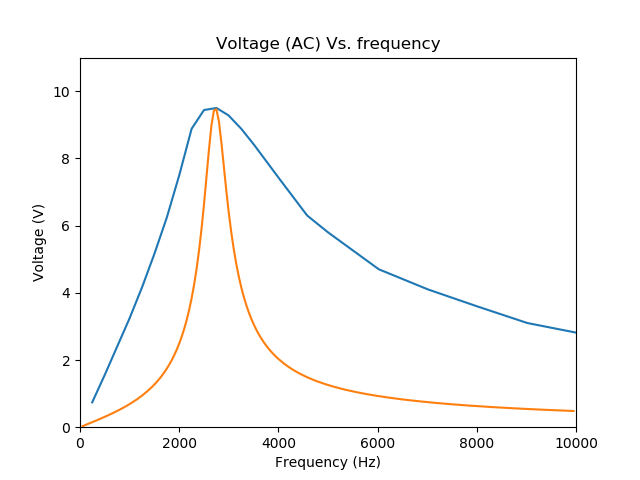

In [151]:
#Edit this cell to plot your theoretical calculation and your measured data for current amplitude as a function of frequency.
plt.figure()
plt.plot(frequencyrlc,Vrlc)
plt.plot(f_theory,Vrlc_theory)
plt.axis([0,10000,0,11])   # Adjust axis parameters as desired.
plt.title("Voltage (AC) Vs. frequency")   # Add appropriate title and axis labels.
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.show()

* * In this cell compare your theoretical curve with the measured data. If there are systematic differences, try to explain their origins.

The relative maxima of these graphs coincide, however, the experimental data is far more shallow, this could be due to internal resonance in imperfect magnetics of the equipment not allowing the voltage to change as sharply.

# When you are done. Print this notebook to a pdf file and upload it to the assignment box in lms for this course.